In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance-premium-prediction/insurance.csv


In [4]:
df = pd.read_csv("/kaggle/input/insurance-premium-prediction/insurance.csv")

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [13]:
df = df.drop(columns = "sex")

In [14]:
df = df.drop(columns ="region")

In [15]:
df = df.drop(columns ="smoker")

In [16]:
df.head()

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.00,27.00,39.00,51.00,64.00
bmi,1337.0,30.665520,6.100664,16.00,26.30,30.40,34.70,53.10
children,1337.0,1.095737,1.205571,0.00,0.00,1.00,2.00,5.00
expenses,1337.0,13279.121638,12110.359657,1121.87,4746.34,9386.16,16657.72,63770.43


<AxesSubplot:>

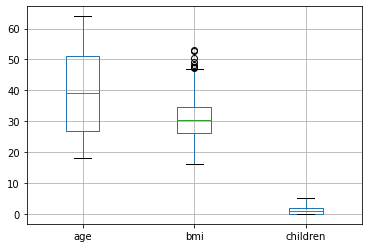

In [18]:
df.drop(columns = "expenses").boxplot()

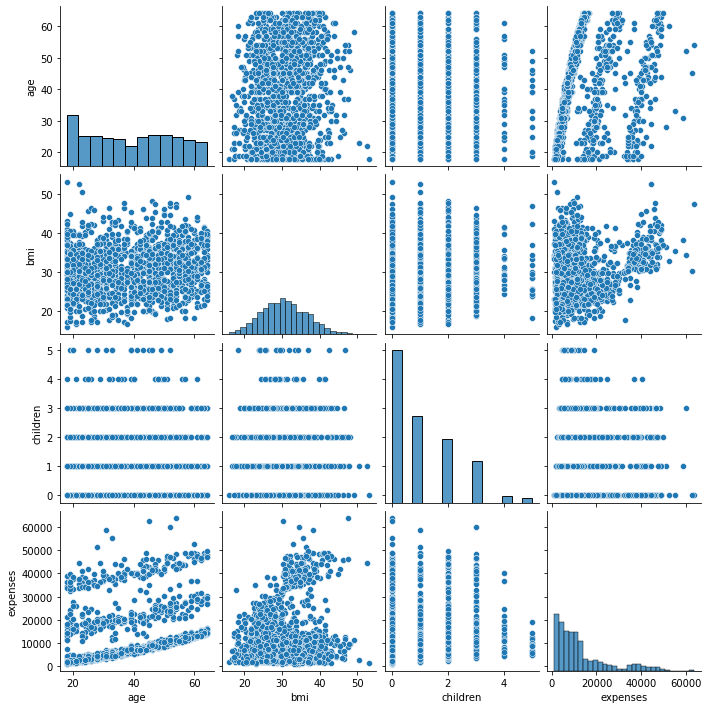

In [20]:
sns.pairplot(df)

In [21]:
%matplotlib inline 

In [22]:
df.corr()

,age,bmi,children,expenses
age,1.000000,0.109414,0.041536,0.298308
bmi,0.109414,1.000000,0.012641,0.198637
children,0.041536,0.012641,1.000000,0.067389
expenses,0.298308,0.198637,0.067389,1.000000


<AxesSubplot:>

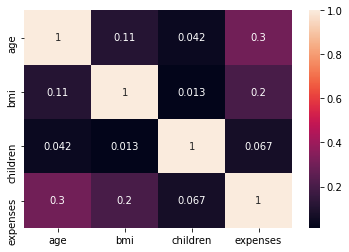

In [23]:
sns.heatmap(df.corr(), annot=True)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [25]:
X = df.drop(columns="expenses")

In [26]:
# calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

    feature       VIF
0       age  7.543602
1       bmi  7.857080
2  children  1.797322


In [27]:
X = df.drop(columns="expenses")

In [29]:
Y = df["expenses"]

In [30]:
model = LinearRegression()

In [31]:
model.fit(X,Y)

LinearRegression()

In [32]:
model.coef_

array([239.49544545, 332.63925679, 539.78283705])

In [33]:
model.intercept_

-6906.4176411738845

In [34]:
y_pred = model.predict(X)

In [35]:
y_pred

array([ 6924.63108677,  9187.4900934 , 12395.89881661, ...,
        9678.88895239,  6705.07953843, 17382.60690399])

In [37]:
print("MSE : ",mean_squared_error(Y,y_pred))

MSE :  129000266.79320599


In [38]:
print("MAE : ",mean_absolute_error(Y,y_pred))

MAE :  9019.31911698732


In [39]:
print("RMSE : ",np.sqrt(mean_squared_error(Y,y_pred)))

RMSE :  11357.828436510476


In [40]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [42]:
print("MAPE : ",mean_absolute_percentage_error(Y,y_pred))

MAPE :  113.56029707546848


In [50]:
def linear_best_fit(X,Y):
    model = LinearRegression()
    model.fit(X,Y)
    y_pred = model.predict(X)
    print("MSE : ",mean_squared_error(Y,y_pred))
    print("MAE : ",mean_absolute_error(Y,y_pred))
    print("RMSE : ",np.sqrt(mean_squared_error(Y,y_pred)))
    print("MAPE : ",mean_absolute_percentage_error(Y,y_pred))

def mean_absolute_percentage_error(Y, y_pred): 
    Y, y_pred = np.array(Y), np.array(y_pred)
    return np.mean(np.abs((Y - y_pred) / Y)) * 100

In [51]:
linear_best_fit(X,Y)

MSE :  129000266.79320599
MAE :  9019.31911698732
RMSE :  11357.828436510476
MAPE :  113.56029707546848


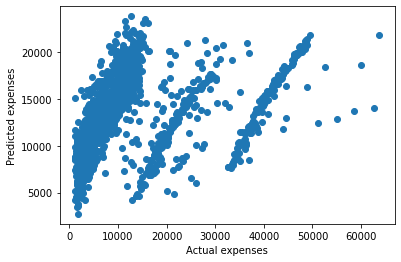

In [52]:
plt.xlabel("Actual expenses")
plt.ylabel("Predicted expenses")

plt.scatter(Y, y_pred)

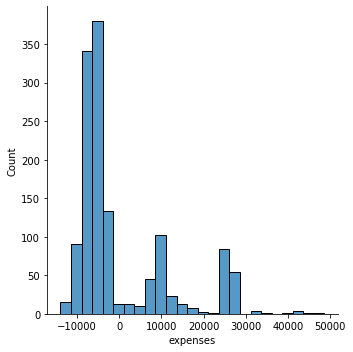

In [53]:
error = Y-y_pred
sns.displot(error)

In [54]:
error = Y-y_pred

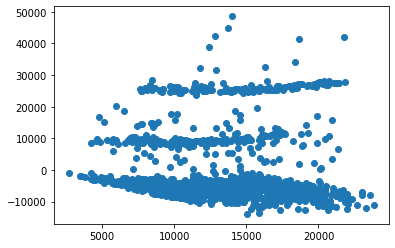

In [55]:
plt.scatter( y_pred, error)

In [57]:
X_train, X_test, y_train, y_test  = train_test_split(X,Y,test_size = 0.3, random_state=90)

In [58]:
X_train.head()

,age,bmi,children
589,38,30.7,1
261,20,26.8,1
744,50,26.4,0
1293,46,25.7,3
1294,58,25.2,0


In [59]:
X_test.head()

,age,bmi,children
1247,33,29.4,4
810,46,30.8,3
164,37,29.6,0
405,52,38.4,2
638,39,26.4,0


In [60]:
y_train

589      5976.83
261     17085.27
744      8827.21
1293     9301.89
1294    11931.13
          ...   
570      3761.29
452      1969.61
680      2585.27
672      4399.73
670      4837.58
Name: expenses, Length: 935, dtype: float64

In [61]:
y_test

1247     6059.17
810      9414.92
164      5028.15
405     11396.90
638     20149.32
          ...   
154      7077.19
1229    11938.26
1136     7623.52
518      5240.77
318      7421.19
Name: expenses, Length: 402, dtype: float64

In [63]:
linear_best_fit(X_train,y_train)

MSE :  121899071.23603381
MAE :  8602.954169567767
RMSE :  11040.791241393608
MAPE :  103.90752089665712


In [64]:
linear_best_fit(X_test,y_test)

MSE :  143821945.40758693
MAE :  9872.338789760905
RMSE :  11992.578763868383
MAPE :  135.39359624945973
